In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
from src.preprocessing.preprocessing import load_and_split_data, NUM_CLASSES 
from src.models.model_definition import create_transfer_model

In [4]:
BATCH_SIZE = 32
train_ds, val_ds, test_ds, ds_info = load_and_split_data(batch_size=BATCH_SIZE)

In [5]:
model = create_transfer_model(input_shape=(224, 224, 3))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                             

In [6]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=7,        
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    filepath='models/efficientnet_addidtional_layer_best.h5', 
    monitor='val_accuracy', 
    mode='max', 
    save_best_only=True
)

In [7]:
history = model.fit(
    train_ds,
    epochs=25,
    validation_data=val_ds,
    callbacks=[early_stopping, model_checkpoint]
)

model.save('models/efficientnet_addidtional_layer.h5', include_optimizer=False)

Epoch 1/25



    131/Unknown - 57s 341ms/step - loss: 1.1475 - accuracy: 0.6362

C:\Users\socik\Documents\food-recognition\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


131/131 [==============================] - 71s 447ms/step - loss: 1.1475 - accuracy: 0.6362 - val_loss: 0.5839 - val_accuracy: 0.8398
Epoch 2/25
131/131 [==============================] - 63s 436ms/step - loss: 0.6960 - accuracy: 0.7812 - val_loss: 0.4178 - val_accuracy: 0.8555
Epoch 3/25
131/131 [==============================] - 61s 426ms/step - loss: 0.5582 - accuracy: 0.8182 - val_loss: 0.4053 - val_accuracy: 0.8586
Epoch 4/25
131/131 [==============================] - 61s 422ms/step - loss: 0.5174 - accuracy: 0.8273 - val_loss: 0.3817 - val_accuracy: 0.8691
Epoch 5/25
131/131 [==============================] - 61s 422ms/step - loss: 0.4432 - accuracy: 0.8477 - val_loss: 0.3827 - val_accuracy: 0.8702
Epoch 6/25
131/131 [==============================] - 61s 423ms/step - loss: 0.4129 - accuracy: 0.8569 - val_loss: 0.3836 - val_accuracy: 0.8712
Epoch 7/25
131/131 [==============================] - 61s 426ms/step - loss: 0.4102 - accuracy: 0.8549 - val_loss: 0.3769 - val_accuracy: 0.8

In [8]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Trening Accuracy')
    plt.plot(epochs_range, val_acc, label='Walidacja Accuracy')
    plt.legend(loc='lower right')
    plt.title('Dokładność (Accuracy)')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Trening Loss')
    plt.plot(epochs_range, val_loss, label='Walidacja Loss')
    plt.legend(loc='upper right')
    plt.title('Strata (Loss)')
    plt.grid(True)
    
    plt.show()

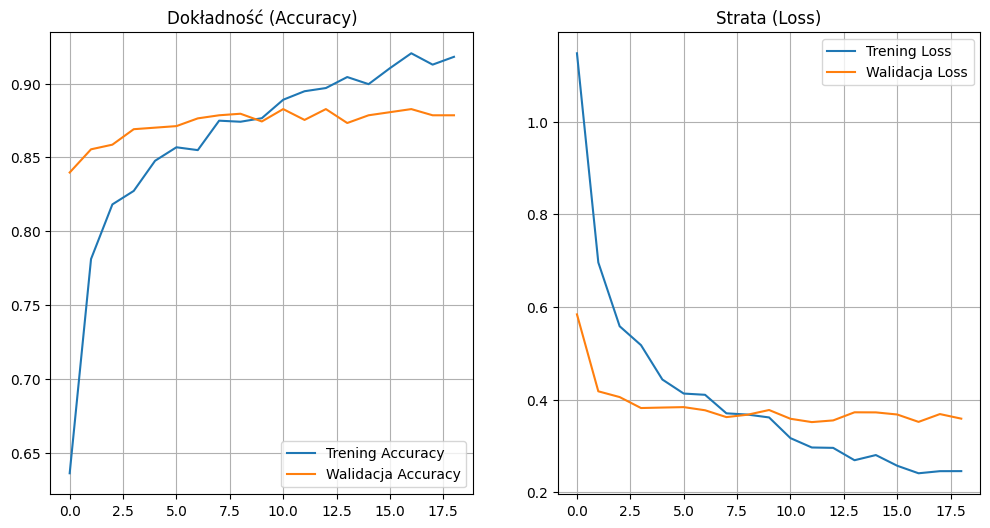

In [9]:
plot_training_history(history)